In [ ]:
#Librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Escala de longitud
h_r = 3

In [ ]:
#Radios galactocentricos
R = np.array([5.0,  5.2,  5.4,  5.6,  5.8,  6.0,  6.2,  6.4,  6.6,  6.8,  7.0, 7.2,  7.4,  7.6,  7.8,  8.0,  8.2,  8.4,  8.6,  8.8,  9.0,  9.2, 9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11.0, 11.3, 11.75, 12.25, 12.75, 13.25, 13.8, 15.8])

In [ ]:
#Densidad
rho = np.exp(-R/h_r)

In [ ]:
#Distancia vertical (promedio)
z_mean = np.array([-0.234,-0.077,-0.162,-0.069,-0.122,-0.112,-0.125,-0.124,-0.078,-0.036,-0.014,0.007,0.016,0.023,0.007,0.010,-0.010,0.009,-0.011,-0.055,-0.054,-0.044,-0.019,-0.039,-0.049,-0.012,0.007,-0.067,-0.032,-0.031,-0.103,-0.030,0.031,0.061,-0.039,0.001,0.496,0.043])

In [ ]:
#Velocidad azimutal (promedio)
V_phi_mean = np.array([230,233,223,203,220,229,229,234,229,231,228,229,232,233,231,234,231,232,229,226,224,224,224,222,225,228,219,230,234,230,232,227,226,229,227,234,208,220])

In [ ]:
#Velocidad de dispersión en la coordenada azimutal
sigma_vphi = np.array([12,8,12,8,8,3,3,3,2,2,1,1,1,1,2,1,2,1,1,1,2,1,1,2,2,4,6,2,5,6,8,9,6,14,5,10,24,12])

In [ ]:
#para crear un data frame
df = pd.DataFrame()
df['R'] = R
df['z_mean'] = z_mean
df['V_phi_mean'] = V_phi_mean
df['sigma_vphi '] = sigma_vphi 
df['rho'] = rho

In [ ]:
df

,R,z_mean,V_phi_mean,sigma_vphi,rho
0,5.00,-0.234,230,12,0.188876
1,5.20,-0.077,233,8,0.176694
2,5.40,-0.162,223,12,0.165299
3,5.60,-0.069,203,8,0.154638
4,5.80,-0.122,220,8,0.144665
5,6.00,-0.112,229,3,0.135335
6,6.20,-0.125,229,3,0.126607
7,6.40,-0.124,234,3,0.118442
8,6.60,-0.078,229,2,0.110803
9,6.80,-0.036,231,2,0.103657


Ecuación de la velocidad circular: \\

$v_{c}^{2} (R) = <V_{\phi}^{2}> - <V_{R}^{2}> (1+\frac{\partial ln\rho}{\partial lnR} + \frac{\partial ln <V_{R}^{2}>}{\partial ln R})$


In [ ]:
#Velocidad radial 
VR = 0 #segun el articulo 

#Derivada parcial de ln rho respecto a R
p1 = (np.diff(np.log(df.rho))/np.diff(df.R))

#Como al realizar la derivada pierde un valor, se le agrega 0 para que quede de la misma dimensión y se pueda operar con los demas datos
P1 = np.append(0,p1)

#Calculo de la velocidad circular
v_c = np.sqrt(df.V_phi_mean**2 - VR**2*(1+P1))
max(v_c)

234.0

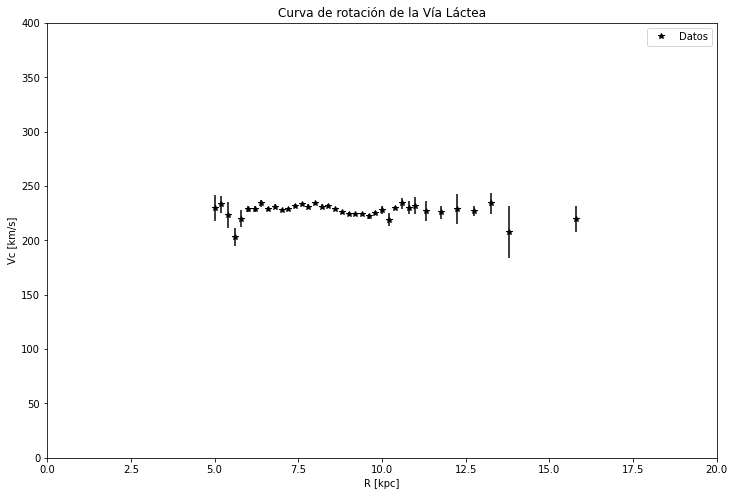

In [ ]:
#Grafica de los valores de radio y velocidad circular
figure(figsize=(12,8))
plt.plot(R,v_c,'*',color='black', label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.xlabel("R [kpc]")
plt.ylabel("Vc [km/s]")
plt.title("Curva de rotación de la Vía Láctea")
#plt.grid()
plt.xlim(0.0,20.0)
plt.ylim(0,400)
plt.legend(loc = 1)
plt.savefig("curva_datos.png")

In [ ]:
Z = mean(z_mean)
Z

-0.02728947368421053

AJUSTES TEORICOS A LA CURVA DE ROTACIÓN

In [ ]:
#Constante Gravitacional.
global G
G = 6.67384E-11*1.9891E30*(1.0001044887813144157/3.086e19)**3 #[kpc^3/(Msun*s^3)]
G

4.518359396955841e-39

PARA EL BULBO \\
Perfil de Plummer $\rho _{b}(r) = \frac{3b_{b}^{2}M_{b}}{4\pi (r^{2}+b_{b}^{2})^{5/2}}$

donde $r = \sqrt{R^2+z^2}$, con $b_{b} = 0.3$ kpc y $M_{b}$ la masa total del bulbo. \\


$V_{c} = \sqrt{\frac{GMr^2}{(r^2+b_{b}^2)^{3/2}}}$


In [ ]:
R_bteorico = np.arange(0,20.2,0.2)
R_bteorico

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. ])

In [ ]:
#Definimos
b_b = 0.3 #Radio de Plummer [kpc]
r = np.sqrt(R_bteorico**2 + Z**2) #Radio esferico del bulbo
M_b = 460.0*2.32e7 #Pouliasis E., Di Matte P., Haywood

In [ ]:
#Densidad del bulbo
rho_b = (3 * b_b**2 * M_b) / (4*np.pi*(r**2 + b_b**2)**(5/2))

In [ ]:
#Para encontrar la masa del bulbo por medio del perfil de Plummer
M_p=(M_b*r**3)/(b_b**2+r**2)**(3/2)
M_p

array([7.93412945e+06, 1.85659225e+09, 5.47776239e+09, 7.64099328e+09,
       8.76243564e+09, 9.37877460e+09, 9.74478398e+09, 9.97723025e+09,
       1.01331247e+10, 1.02423834e+10, 1.03217541e+10, 1.03811463e+10,
       1.04267038e+10, 1.04623910e+10, 1.04908537e+10, 1.05139108e+10,
       1.05328447e+10, 1.05485801e+10, 1.05617968e+10, 1.05730039e+10,
       1.05825881e+10, 1.05908477e+10, 1.05980156e+10, 1.06042756e+10,
       1.06097747e+10, 1.06146311e+10, 1.06189412e+10, 1.06227838e+10,
       1.06262240e+10, 1.06293161e+10, 1.06321055e+10, 1.06346304e+10,
       1.06369232e+10, 1.06390114e+10, 1.06409187e+10, 1.06426654e+10,
       1.06442689e+10, 1.06457446e+10, 1.06471056e+10, 1.06483635e+10,
       1.06495285e+10, 1.06506095e+10, 1.06516144e+10, 1.06525501e+10,
       1.06534228e+10, 1.06542382e+10, 1.06550010e+10, 1.06557158e+10,
       1.06563864e+10, 1.06570164e+10, 1.06576091e+10, 1.06581673e+10,
       1.06586937e+10, 1.06591906e+10, 1.06596601e+10, 1.06601044e+10,
      

In [ ]:
#Velocidad circular
vc_b = np.sqrt((G*M_p*r**2)/((r**2+b_b**2)**(3/2)))

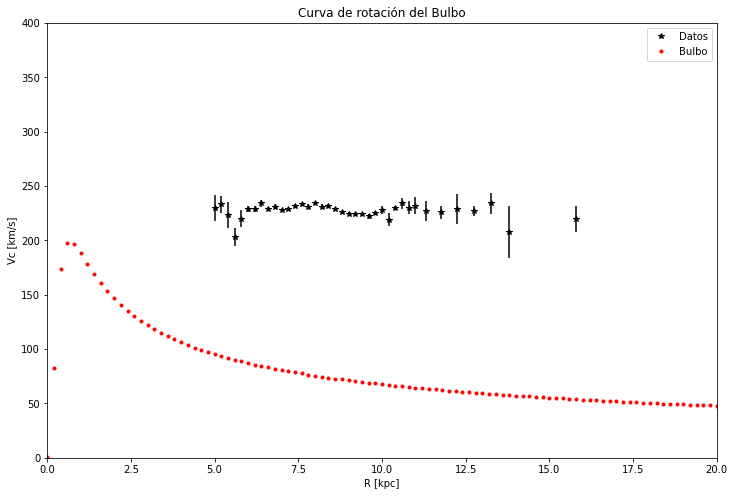

In [ ]:
#Grafica.
figure(figsize=(12,8))
plt.plot(R,v_c,'*',color='black', label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_b*(3.086e16/1.0001044887813144157),'.', color="red", label="Bulbo")
plt.title("Curva de rotación del Bulbo")
plt.xlabel("R [kpc]")
plt.ylabel("Vc [km/s]")
plt.xlim(0,20)
plt.ylim(0,400)
plt.legend(loc = 1)
plt.savefig("bulge_curve.png")

PARA EL DISCO: \\

Perfil de Miyamoto-Nagai \\
$\rho_{d}(R,z) = \frac{M_{b}b_{b}^{2}}{4\pi} \frac{[a_{d}R^2+(a_{d}+3 \sqrt{z^2+b_{d}^2})(a_{d}+\sqrt{z^2+b_{d}^2})^2]}{[R^2(a_{d}+\sqrt{z^2+b_{d}^2})^2]^{5/2}(z^2+b_{d}^2)^{3/2}}$

In [ ]:
#Definimos 

#Masa total del disco delgado 
Mdel = 1700*2.32e7 #Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#Masa total del disco grueso
Mgru = 1700*2.32e7 #Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#Escala de longitud disco delgado
#a_del = 0.35 #[kpc] Carroll
a_del = 5.3 #Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#Escala de longitud disco grueso
#a_gru = 1 #[kpc] Carroll
a_gru = 2.6 #Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#Escala de altura disco delgado
b_td = 0.25 #[kpc] Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#Escala de altura  disco grueso
b_Td = 0.8 #[kpc] Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#z disco delgado
z_del = 0.2 #[kpc] Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

#z disco grueso
z_gru = 0.7 #[kpc] Pouliasis E., Di Matte P., Haywood M., 2017, A&A, 598, A66

In [ ]:
Mdel

39440000000.0

In [ ]:
f = 0.05

In [ ]:
#Densidad disco delgado
rho_del = ((Mdel*b_td**2)/(4*np.pi))*((a_del*R**2+(a_del+3*np.sqrt(z_del**2+b_td**2)*(a_del+np.sqrt(z_del**2+b_td**2)**2))))/((R**2*(a_del+np.sqrt(z_del**2+b_td**2)**2))**(5/2)*(z_del**2+b_td**2)**(3/2))

In [ ]:
#Velocidad circular para el disco delgado
vc_del = R_bteorico*(np.sqrt((G*Mdel*f)/(R_bteorico**2+(a_del+b_td**2)**(3/2))))
vc_del

array([0.00000000e+00, 1.69141439e-16, 3.36665320e-16, 5.01030298e-16,
       6.60839248e-16, 8.14892406e-16, 9.62221644e-16, 1.10210491e-15,
       1.23406263e-15, 1.35783963e-15, 1.47337730e-15, 1.58078039e-15,
       1.68028238e-15, 1.77221235e-15, 1.85696536e-15, 1.93497715e-15,
       2.00670358e-15, 2.07260462e-15, 2.13313242e-15, 2.18872281e-15,
       2.23978963e-15, 2.28672129e-15, 2.32987904e-15, 2.36959645e-15,
       2.40617984e-15, 2.43990927e-15, 2.47103992e-15, 2.49980371e-15,
       2.52641103e-15, 2.55105247e-15, 2.57390052e-15, 2.59511123e-15,
       2.61482572e-15, 2.63317162e-15, 2.65026440e-15, 2.66620855e-15,
       2.68109871e-15, 2.69502061e-15, 2.70805202e-15, 2.72026350e-15,
       2.73171918e-15, 2.74247735e-15, 2.75259108e-15, 2.76210873e-15,
       2.77107441e-15, 2.77952839e-15, 2.78750750e-15, 2.79504543e-15,
       2.80217304e-15, 2.80891865e-15, 2.81530825e-15, 2.82136573e-15,
       2.82711307e-15, 2.83257052e-15, 2.83775675e-15, 2.84268898e-15,
      

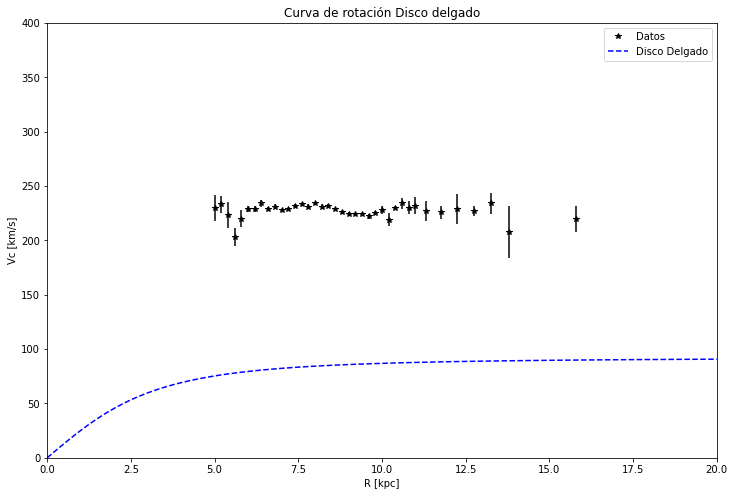

In [ ]:
#Grafica.
figure(figsize=(12,8))
plt.plot(R,v_c,'*',color='black', label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_del*(3.086e16/1.0001044887813144157), '--',color="blue", label="Disco Delgado")
plt.title("Curva de rotación Disco delgado")
plt.xlabel("R [kpc]")
plt.ylabel("Vc [km/s]")
plt.xlim(0,20)
plt.ylim(0,400)
plt.legend(loc = 1)

In [ ]:
max(vc_del*(3.086e16/1.0001044887813144157))

90.71008772473942

In [ ]:
#Densidad disco grueso
rho_gru = ((Mgru*b_Td**2)/(4*np.pi))*((a_gru*R**2+(a_gru+3*np.sqrt(z_gru**2+b_Td**2)*(a_gru+np.sqrt(z_gru**2+b_Td**2)**2))))/((R**2*(a_gru+np.sqrt(z_gru**2+b_Td**2)**2))**(5/2)*(z_gru**2+b_Td**2)**(3/2))

In [ ]:
fg = 0.10

In [ ]:
#Velocidad para el disco grueso
vc_gru = R_bteorico*np.sqrt((G*Mgru*fg)/(R_bteorico**2+(a_gru+b_Td**2)**(3/2)))
vc_gru

array([0.00000000e+00, 3.48414172e-16, 6.89815468e-16, 1.01787539e-15,
       1.32748485e-15, 1.61504605e-15, 1.87850844e-15, 2.11720252e-15,
       2.33155725e-15, 2.52278258e-15, 2.69257556e-15, 2.84288055e-15,
       2.97571199e-15, 3.09303497e-15, 3.19669238e-15, 3.28836665e-15,
       3.36956513e-15, 3.44162060e-15, 3.50570072e-15, 3.56282210e-15,
       3.61386620e-15, 3.65959547e-15, 3.70066857e-15, 3.73765437e-15,
       3.77104437e-15, 3.80126367e-15, 3.82868043e-15, 3.85361405e-15,
       3.87634212e-15, 3.89710643e-15, 3.91611805e-15, 3.93356162e-15,
       3.94959904e-15, 3.96437263e-15, 3.97800773e-15, 3.99061505e-15,
       4.00229254e-15, 4.01312711e-15, 4.02319599e-15, 4.03256801e-15,
       4.04130461e-15, 4.04946076e-15, 4.05708573e-15, 4.06422380e-15,
       4.07091481e-15, 4.07719466e-15, 4.08309581e-15, 4.08864763e-15,
       4.09387673e-15, 4.09880728e-15, 4.10346126e-15, 4.10785870e-15,
       4.11201786e-15, 4.11595543e-15, 4.11968670e-15, 4.12322566e-15,
      

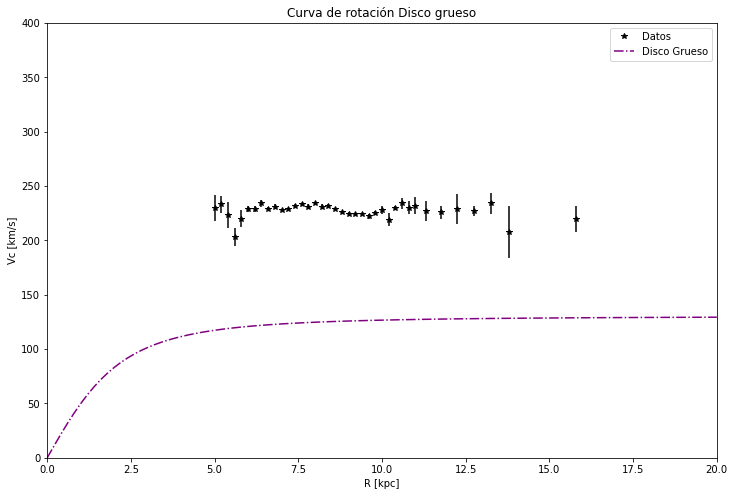

In [ ]:
#Grafica.
figure(figsize=(12,8))
plt.plot(R,v_c,'*',color='black', label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_gru*(3.086e16/1.0001044887813144157),'-.', color="purple", label="Disco Grueso")
plt.title("Curva de rotación Disco grueso")
plt.xlabel("R [kpc]")
plt.ylabel("Vc [km/s]")
plt.xlim(0,20)
plt.ylim(0,400)
plt.legend(loc = 1)

In [ ]:
max(vc_gru*(3.086e16/1.0001044887813144157))

129.3201608209779

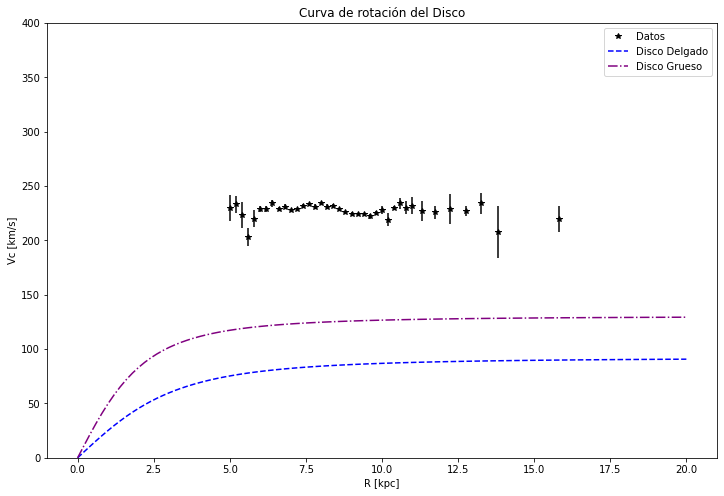

In [ ]:
#Grafica de los datos y todos los ajustes
plt.figure(figsize=(12,8))
plt.plot(R,v_c,'*',color='black', label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_del*(3.086e16/1.0001044887813144157), "--", color="blue", label="Disco Delgado")
plt.plot(R_bteorico,vc_gru*(3.086e16/1.0001044887813144157), "-.", color="purple", label="Disco Grueso")
plt.xlabel("R [kpc]")
plt.title("Curva de rotación del Disco")
plt.ylim(0,400)
plt.ylabel("Vc [km/s]")
plt.legend(loc = 1)
#plt.grid()
plt.savefig("disk_curve.png")

PARA EL HALO DE MATERIA OSCURA: \\

$\rho_{h}(r) = \frac{\rho_{0}}{(r/a_{h})(1+r/a_{h})^{2}}$

donde $\rho_{0}$ es la densidad de escala del halo de DM y $a_{h}$ es el radio de escala.

$\Phi_{h}(r) = \frac{-4\pi G \rho_{0}a^{2}}{r/a} ln(1+r/a)$


In [ ]:
#Definimos
a_h = 18
#a_h = 14.8 #Eilers et al.2019
#rho_0 = 7.18e-3 #M⊙ pc−3  http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/dh2011/ms.pdf
rho_0 = 2e7 #Eilers et al.2019

In [ ]:
rho_h = rho_0 / ((R_bteorico/a_h)*(1+(R_bteorico/a_h)**2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.



$M_{h} = 4\pi \rho_{0}a^{3}[ln(1+r/a)-\frac{r/a}{1+r/a}]$

In [ ]:
#Definimos la masa
#M_h = 4*np.pi*rho_h*a_h**3*(np.log(1+R_bteorico/a_h)-((R_bteorico/a_h)/(1+R_bteorico/a_h)))

#https://repositorio.unal.edu.co/bitstream/handle/unal/78533/80834000.2020.pdf?sequence=1&isAllowed=y
#M_0 = 5e11
M_0 = 4*np.pi*rho_0*a_h**3
#M_h = M_0*(np.log(1+R_bteorico/a_h)-((R_bteorico/a_h)/(1+R_bteorico/a_h)))

In [ ]:
M_h = (M_0)*(np.log(1+R_bteorico/a_h)-((R_bteorico/a_h)/(1+R_bteorico/a_h)))

In [ ]:
#Definimos la velocidad circular a partir de la derivada del potencial
#velocidad = np.sqrt((-4*np.pi*G*a_h**3*(R_bteorico-(a_h+R_bteorico)*np.log((a_h+R_bteorico)/a_h))) / (r*(a_h+R_bteorico)))
#velocidad

In [ ]:
vc_h = np.sqrt((G*M_h)/R_bteorico)
vc_h

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([           nan, 1.41920731e-15, 1.99247183e-15, 2.42270530e-15,
       2.77756033e-15, 3.08348756e-15, 3.35417765e-15, 3.59783838e-15,
       3.81986670e-15, 4.02404558e-15, 4.21315426e-15, 4.38930953e-15,
       4.55417033e-15, 4.70906721e-15, 4.85508798e-15, 4.99313646e-15,
       5.12397391e-15, 5.24824918e-15, 5.36652103e-15, 5.47927494e-15,
       5.58693617e-15, 5.68987984e-15, 5.78843894e-15, 5.88291079e-15,
       5.97356220e-15, 6.06063376e-15, 6.14434331e-15, 6.22488891e-15,
       6.30245124e-15, 6.37719570e-15, 6.44927415e-15, 6.51882644e-15,
       6.58598167e-15, 6.65085932e-15, 6.71357022e-15, 6.77421742e-15,
       6.83289687e-15, 6.88969816e-15, 6.94470500e-15, 6.99799582e-15,
       7.04964415e-15, 7.09971908e-15, 7.14828560e-15, 7.19540491e-15,
       7.24113475e-15, 7.28552962e-15, 7.32864105e-15, 7.37051782e-15,
       7.41120613e-15, 7.45074979e-15, 7.48919039e-15, 7.52656745e-15,
       7.56291855e-15, 7.59827944e-15, 7.63268420e-15, 7.66616530e-15,
      

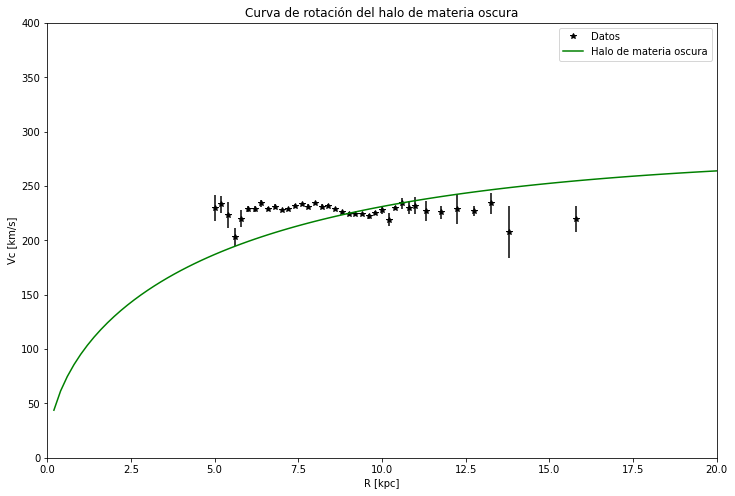

In [ ]:
#Grafica.
plt.figure(figsize=(12,8))
plt.plot(R,v_c,'*',color='black', label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_h*(3.086e16/1.0001044887813144157),'-', color="green", label="Halo de materia oscura")
plt.title("Curva de rotación del halo de materia oscura")
plt.xlabel("R [kpc]")
plt.ylabel("Vc [km/s]")
plt.xlim(0,20)
plt.ylim(0,400)
plt.legend(loc = 1)
plt.savefig("dark_curve.png")

Text(0.5, 1.0, 'Curva de rotación de la Vía Láctea')

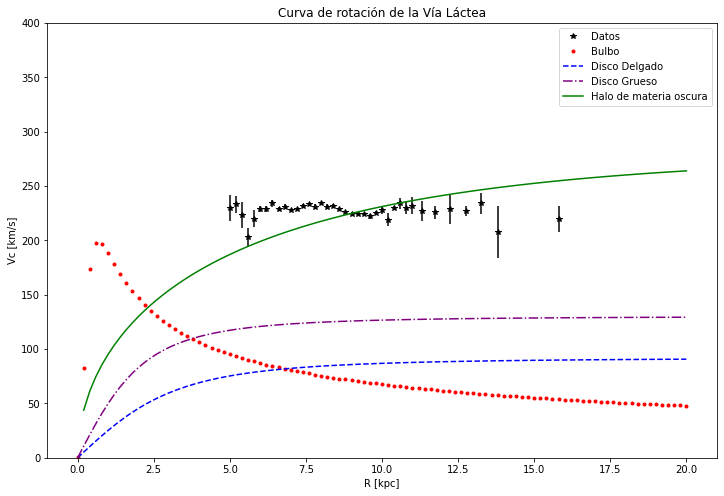

In [ ]:
#Grafica de los datos y todos los ajustes
plt.figure(figsize=(12,8))
plt.plot(R,v_c, "*", color="black", label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_b*(3.086e16/1.0001044887813144157), ".", color="red", label="Bulbo")
plt.plot(R_bteorico,vc_del*(3.086e16/1.0001044887813144157), "--", color="blue", label="Disco Delgado")
plt.plot(R_bteorico,vc_gru*(3.086e16/1.0001044887813144157), "-.", color="purple", label="Disco Grueso")
plt.plot(R_bteorico,vc_h*(3.086e16/1.0001044887813144157),'-', color="green", label="Halo de materia oscura")
plt.xlabel("R [kpc]")
plt.ylim(0,400)
plt.ylabel("Vc [km/s]")
plt.legend(loc = 1)
plt.title("Curva de rotación de la Vía Láctea")
#plt.grid()

MODELO RELATIVISTA \\
Mismo artículo de los datos (On testing CDM and geometry-driven Milky Way rotation curve models with Gaia DR2)


$V^{BG} (R) = \frac{V0}{R}(R_{out} - r_{in} + \sqrt{r_{in}^{2} + R^{2}} - \sqrt{R_{out}^{2} + R^{2}})
$

In [ ]:
r_in = 0.39
R_out = 47.87
V0 = 263.10

In [ ]:
#Velocidad
V_BG = (V0/r)*(R_out - r_in + np.sqrt(r_in**2 + r**2) - np.sqrt(R_out**2 + r**2))


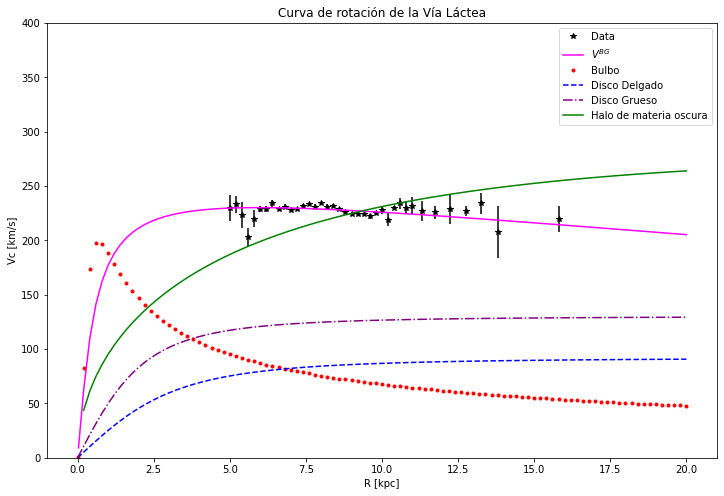

In [ ]:
#Grafica de los datos y todos los ajustes
plt.figure(figsize=(12,8))
plt.plot(R,v_c, "*", color="black", label="Data")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(r,V_BG,'-', color="magenta", label="$V^{BG}$")
plt.plot(R_bteorico,vc_b*(3.086e16/1.0001044887813144157), ".", color="red", label="Bulbo")
plt.plot(R_bteorico,vc_del*(3.086e16/1.0001044887813144157), "--", color="blue", label="Disco Delgado")
plt.plot(R_bteorico,vc_gru*(3.086e16/1.0001044887813144157), "-.", color="purple", label="Disco Grueso")
plt.plot(R_bteorico,vc_h*(3.086e16/1.0001044887813144157),'-', color="green", label="Halo de materia oscura")
plt.xlabel("R [kpc]")
plt.ylim(0,400)
plt.ylabel("Vc [km/s]")
plt.legend(loc = 1)
plt.title("Curva de rotación de la Vía Láctea")
#plt.grid()
plt.savefig("milky way curves.png")

#POTENCIALES ESFERICOS

HERNQUIST BULBO

$\rho(r) = \frac{M}{2\pi}\frac{a}{r(r+a)^{3}}$

In [ ]:
m0 = M_b

In [ ]:
rho_her = (m0*b_b)/(2*np.pi*R_bteorico*(R_bteorico+b_b)**3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


$M(r) = \frac{Mr^{2}}{(r+a)^{2}}$

In [ ]:
M_her = (m0*R_bteorico**2)/(R_bteorico+b_b)**2

$v_{c}(r) = \sqrt{\frac{GMr}{(r+a)}}$

In [ ]:
V_her = np.sqrt((G*M_her*R_bteorico)/(R_bteorico+b_b))

JAFFE BULBO \\

$\rho(r) = \frac{M}{4\pi}\frac{a}{r^{2}(r+a)^{2}}$

In [ ]:
rho_jaff = (m0*b_b)/(4*np.pi*R_bteorico**2*(R_bteorico+b_b)**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


$M(r) = \frac{Mr}{(r+a)}$

In [ ]:
M_jaff = (m0*R_bteorico)/(R_bteorico+b_b)

$v_{c}(r) = \sqrt{\frac{GM}{(r+a)}}$

In [ ]:
V_jaff = np.sqrt((G*M_jaff)/(R_bteorico+b_b))

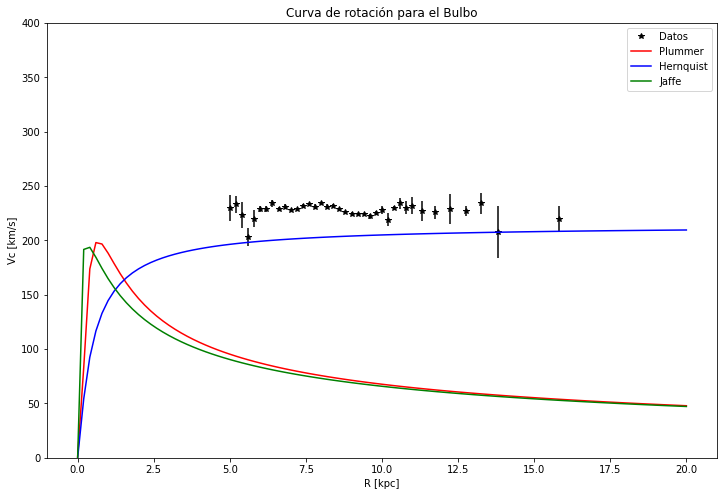

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(R,v_c, "*", color="black", label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,vc_b*(3.086e16/1.0001044887813144157), "-", color="red", label="Plummer")
plt.plot(R_bteorico,V_her*(3.086e16/1.0001044887813144157), "-", color="blue", label="Hernquist")
plt.plot(R_bteorico,V_jaff*(3.086e16/1.0001044887813144157), "-", color="green", label="Jaffe")
plt.xlabel("R [kpc]")
plt.ylim(0,400)
plt.ylabel("Vc [km/s]")
plt.legend(loc = 1)
plt.title("Curva de rotación para el Bulbo")
#plt.grid()
plt.savefig("perfiles bulbo.png")

#POTENCIALES HALO DM

Salucci, P., & Burkert, A. (2000). Dark matter scaling relations. The Astrophysical Journal, 537(1), L9.

BURKERT

$\rho_{BK} = \frac{\rho_{0}a^{3}}{(r+a)(r^{2}+a^{2})}$

In [ ]:
rho_bk = (rho_0*a_h**3)/((R_bteorico+a_h)*(R_bteorico**2+a_h**2))

$M_{b}(r) = 4M_{0}[ln(1+\frac{r}{a})-tan^{-1}(\frac{r}{a})+\frac{1}{2}ln[1+(\frac{r}{a})^2]]$

In [ ]:
#Definimos materia negra dentro del núcleo
M_0 = 1.6*rho_0*a_h**3

In [ ]:
m_bk = 4*M_0*(np.log(1+R_bteorico/a_h)-np.arctan(R_bteorico/a_h)+ (1/2)*np.log(1+(R_bteorico/a_h)**2))

$V = \sqrt{\frac{G}{R}M_{BK}}$

In [ ]:
v_bk = np.sqrt((G*m_bk)/R_bteorico)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


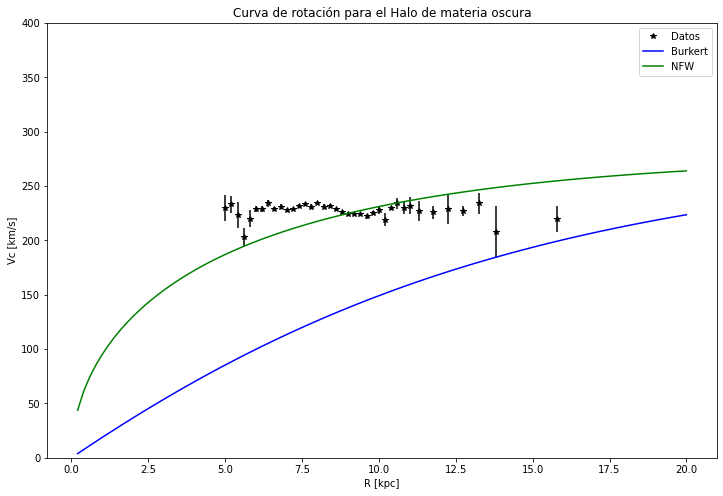

In [ ]:
#Grafica de los datos y todos los ajustes
plt.figure(figsize=(12,8))
plt.plot(R,v_c, "*", color="black", label="Datos")
plt.errorbar(R,v_c,yerr=sigma_vphi, linestyle='None', fmt = 'black', ms=8)
plt.plot(R_bteorico,v_bk*(3.086e16/1.0001044887813144157),"-", color="blue", label="Burkert")
plt.plot(R_bteorico,vc_h*(3.086e16/1.0001044887813144157),'-', color="green", label="NFW")
plt.xlabel("R [kpc]")
plt.ylim(0,400)
plt.ylabel("Vc [km/s]")
plt.legend(loc = 1)
plt.title("Curva de rotación para el Halo de materia oscura")
#plt.grid()
plt.savefig("perfiles dm.png")